In [4]:
import numpy as np 
from scipy.stats import binom, norm, wilcoxon
import matplotlib.pyplot as plt

#### Soient $\displaystyle X_1, . . . , X_n$ un échantillon aléatoire. On veut tester si la distribution de X est symétrique par rapport à 0. Pour rejeter l’hypothèse de symétrie, une condition suffisante est que la médiane soit différente de zéro. On va donc considérer le test induit ”la médiane de X est-elle nulle ?”.


   # 1. Test de localisation du Signe       
   Objectif : Faire un test sur un paramètre de position, qui n’est ici pas la moyenne, mais la médiane.
   Le test des signes permet de tester l’hypothèse suivante :
###### H0 : me = 0
contre
###### H1 : me <> 0, ou me < 0, ou me > 0

### Calcul de la statistique $S_n^+ = \displaystyle\sum_{i=1}^{i=n}1_{\mathbb{R}_+^*}(X_i)$
Sous $\displaystyle\mathcal{H_0}, \theta=0, \mathbb{S_n^+} \sim \mathcal{B}(n,\frac{1}{2})$. L'espérence $E(S_n) = \displaystyle\frac{n}{2}$ et la variance $V(S_n) = \displaystyle\frac{n}{4}$

La région critique du test est : 

$\displaystyle\mathbb{W} = \{\mathbb{S_n^+} \ge c\}$ pour $\mathbb{H_1} : \theta \ge 0$

$\mathbb{W} = \{\mathbb{S_n^+} \le c$\} pour $\mathbb{H_1} : \theta \le 0$

$\displaystyle\mathbb{W} = \{\mathbb{S_n^+} \ge C_1\} \cup \{\mathbb{S_n^+} \le C_2\}$ pour $\mathbb{H_1} : \theta \ne 0$

Pour $\mathbb{n}$ assez grand on peut utiliser l'approximation $\displaystyle\frac{\mathbb{S_n^+} - \mathbb{E}(\mathbb{S_n^+})}{\sqrt{\mathbb{V}(\mathbb{S_n^+})}}$


In [5]:
def stats(vec : list):
    """Renvoie à la statistique de Signe, son espérence et sa variance"""
    n = len(vec)
    return (np.array(vec) >= 0).sum(), n / 2, n / 4

In [6]:
def test_localisation_Signe(ech, alter='<', alpha=0.05, med=0):
    """
    Objectif : Faire un test sur un paramètre de position, qui n’est ici pas la moyenne, mais la médiane.
    Le test des signes permet de tester l’hypothèse suivante :
    ###### H0 : med = 0
    contre
    ###### H1 : med <> 0 ou med >0 ou med < 0
    
        - ech = échantillon aléatoire  X1, . . . , Xn
        - alter = hypothèse alternative du test 
        - alpha = seuil critique
        - med = médiane de l'échantillon
        - alpha est initialisé à 0.05. Si différent de 0.05, indiquer la valeur.
        - med est initialisé à zéro, dans ce cas on suppose que la série est déjà centrée. Sinon indiquer la valeur de la médiane.
    """
    if med != 0:
        ech = list(np.array(ech) - med)
    Sn, E, Var = stats(ech)
    n = len(ech)
    if n < 30:
        if alter=='<':
            c = binom.ppf(alpha, n, 0.5)
            p_value = binom.cdf(Sn, n, 0.5)
        elif alter=='>':
            c = binom.ppf(1 - alpha, n, 0.5)
            p_value = 1 - binom.cdf(Sn, n, 0.5)
        elif alter=='<>':
            c = binom.interval(alpha, n, 0.5)
            p_value = 2 * (1 - binom.cdf(Sn, n, 0.5))
        else:
            raise('Invalid alternative')
    else:
        from math import sqrt
        S = (Sn - E) / sqrt(Var)
        if alter=='<':
            c = norm.ppf(alpha, 0, 1)
            c = (c * sqrt(Var)) + E
            p_value = norm.cdf(S, 0, 1)
        elif alter=='>':
            c = norm.ppf(1 - alpha, 0, 1)
            c = (c * sqrt(Var)) + E
            p_value = 1 - norm.cdf(S, 0, 1)
        elif alter=='<>':
            c1, c2 = norm.interval(alpha, 0, 1)
            print(c1,c2)
            c = ((c1 * sqrt(Var)) + E, (c2 * sqrt(Var)) + E)
            p_value = 2 * (1 - norm.cdf(S, 0, 1))
        else:
            raise('Invalid alternative')
    return Sn, c, p_value, alter, alpha, med

In [7]:
help(test_localisation_Signe)

Help on function test_localisation_Signe in module __main__:

test_localisation_Signe(ech, alter='<', alpha=0.05, med=0)
    Objectif : Faire un test sur un paramètre de position, qui n’est ici pas la moyenne, mais la médiane.
    Le test des signes permet de tester l’hypothèse suivante :
    ###### H0 : med = 0
    contre
    ###### H1 : med <> 0 ou med >0 ou med < 0
    
        - ech = échantillon aléatoire  X1, . . . , Xn
        - alter = hypothèse alternative du test 
        - alpha = seuil critique
        - med = médiane de l'échantillon
        - alpha est initialisé à 0.05. Si différent de 0.05, indiquer la valeur.
        - med est initialisé à zéro, dans ce cas on suppose que la série est déjà centrée. Sinon indiquer la valeur de la médiane.



## Exemple

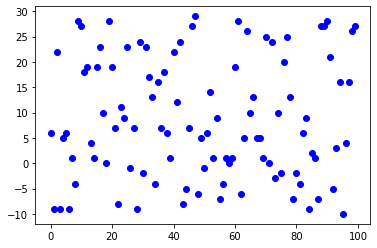

In [8]:
import random
# Exemple
X = [random.randrange(-10, 30) for i in range(100)]
plt.plot(X, 'bo')

In [9]:
results = test_localisation_Signe(X, alter='<>') #, centered=True, med=10)
results

-0.06270677794321385 0.06270677794321385


(75,
 (49.68646611028393, 50.31353388971607),
 5.733031438470704e-07,
 '<>',
 0.05,
 0)

In [10]:
wilcoxon(X, alternative='two-sided') # (less == <, greater == >, two-sided == <>)

WilcoxonResult(statistic=772.0, pvalue=7.655968186119166e-09)

In [15]:
def display(results):
    print("=============== Test de localisation du Signe ===============")
    print('Ho : theta = 0')
    print('vs')
    print("H1 : theta {} 0".format(results[3]))
    if results[3] == '<>':
        print("Region critique W = {0}Sn < {1}{3} U {0}Sn > {2}{3}".format('{',results[1][0], results[1][1],'}'))
    else:
        print("Region critique W = {}Sn {} {}{}".format('{',results[3],results[1],'}'))
    print("=============================================================")
    print("S statistic : {}".format(results[0]))
    print("Valeur(s) critique(s) : {} (seuil = {})".format(results[1], results[4]))
    print("p_value : {}".format(results[2]))
    print("=================== Regle de décision ========================")
    if results[2] < results[4]:
        print('p_value = {} < seuil = {} donc on rejette H0'.format(results[2], results[4]))
    else :
        print('p_value = {} > seuil = {} donc on ne rejette pas H0'.format(results[2], results[4]))
        print('La médiane est égale à {}'.format(results[5]))

In [16]:
display(results)

=============== Test de localisation du Signe ===============
Ho : theta = 0
vs
H1 : theta <> 0
Region critique W = {Sn < 49.68646611028393} U {Sn > 50.31353388971607}
S statistic : 75
Valeur(s) critique(s) : (49.68646611028393, 50.31353388971607) (seuil = 0.05)
p_value : 5.733031438470704e-07
=================== Regle de décision ========================
p_value = 5.733031438470704e-07 < seuil = 0.05 donc on rejette H0
